In [1]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 加载 MNIST 数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 查看原始数据形态
print("原始训练数据形状:", x_train.shape)  # (60000, 28, 28)
print("像素值范围:", np.min(x_train[0]), "-", np.max(x_train[0]))  # 0-255

原始训练数据形状: (60000, 28, 28)
像素值范围: 0 - 255


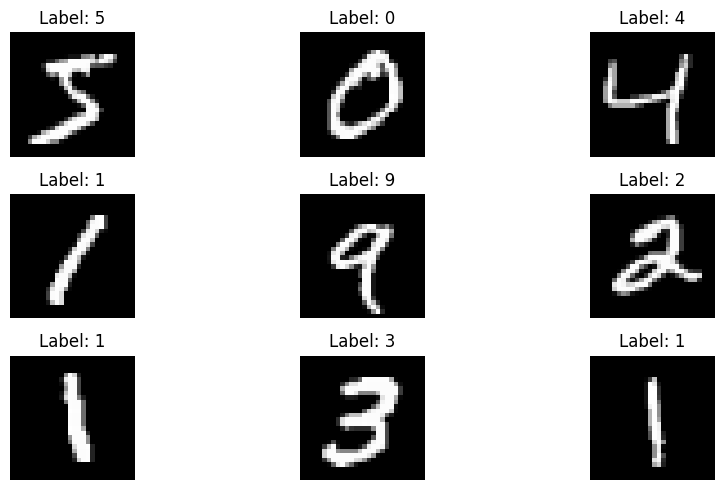

In [2]:
# 随机选择9个样本可视化
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# 将像素值从 [0,255] 缩放到 [0,1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# 查看归一化后的数值
print("归一化后像素值范围:", np.min(x_train_normalized[0]), "-", np.max(x_train_normalized[0]))

归一化后像素值范围: 0.0 - 1.0


In [4]:
# 将图像从 (28,28) 转换为 (28,28,1) 以适应卷积层输入
x_train_reshaped = x_train_normalized[..., np.newaxis]
x_test_reshaped = x_test_normalized[..., np.newaxis]

print("调整后的数据形状:", x_train_reshaped.shape)  # (60000, 28, 28, 1)

调整后的数据形状: (60000, 28, 28, 1)


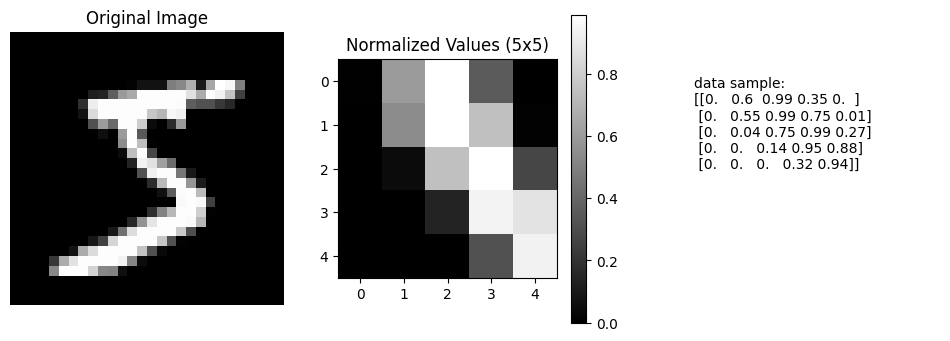

In [5]:
# 对比原始图像与数值化表示
sample_idx = 0  # 选择第一个样本

# 显示原始图像
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(x_train[sample_idx], cmap='gray')
plt.title("Original Image")
plt.axis('off')

# 显示归一化后的数值矩阵（仅显示部分区域）
plt.subplot(1, 3, 2)
cropped_data = x_train_normalized[sample_idx, 10:15, 10:15]  # 截取5x5区域
plt.imshow(cropped_data, cmap='gray')
plt.title("Normalized Values (5x5)")
plt.colorbar()

# 打印具体数值
plt.subplot(1, 3, 3)
plt.axis('off')
plt.text(0.1, 0.5, 
         "data sample:\n" + 
         str(np.round(cropped_data, 2)), 
         fontsize=10)
plt.show()

## 5. 构建卷积神经网络（理解抽象化过程）

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D

# 定义模型时显式添加 InputLayer
model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),  # 修复关键点
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    # 其他层...
])

# 获取中间层输出
layer_outputs = [layer.output for layer in model.layers[:2]]  # 取前两层
activation_model = Model(inputs=model.input, outputs=layer_outputs)  # ✅ 不再报错

# 测试中间模型
sample_image = x_train_reshaped[0:1]  # 输入形状 (1,28,28,1)
activations = activation_model.predict(sample_image)
print("中间层输出形状:", [a.shape for a in activations])

/opt/anaconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-02-24 01:58:21.233358: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-02-24 01:58:21.233377: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-24 01:58:21.233383: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-24 01:58:21.233398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-24 01:58:21.233407: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


ValueError: The layer sequential has never been called and thus has no defined input.